In [320]:
# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (EDA)

In [3]:
# Finding count of each classes
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

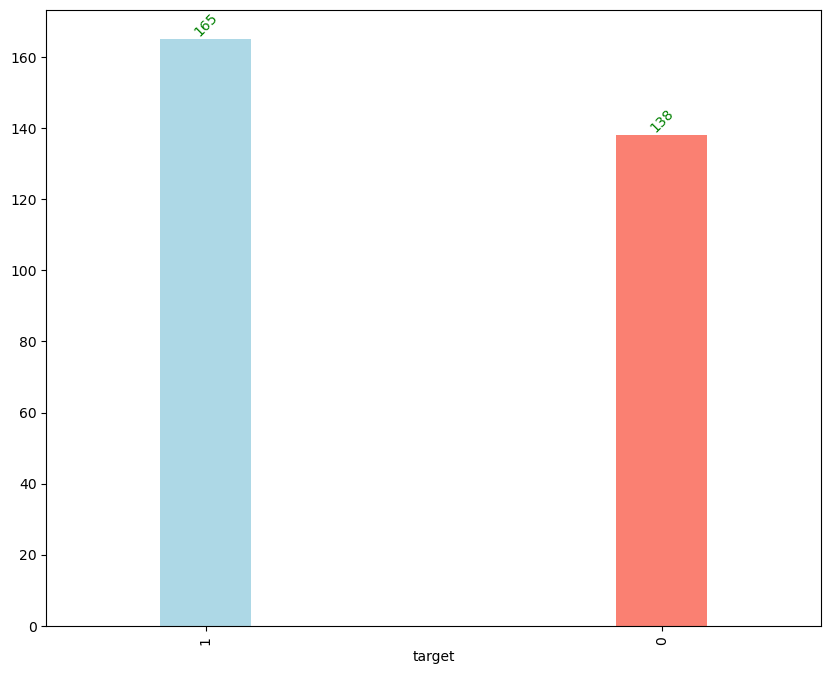

In [4]:
plt.figure(figsize=(10, 8))
ax = df['target'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'], width=0.2);
for p in ax.patches:
    plt.annotate(p.get_height(), 
                 (p.get_x()+p.get_width()/2, p.get_height()),
                 ha='center', va='bottom', color='green', rotation=45)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Finding any missing-values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
# Comparing sex with target column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

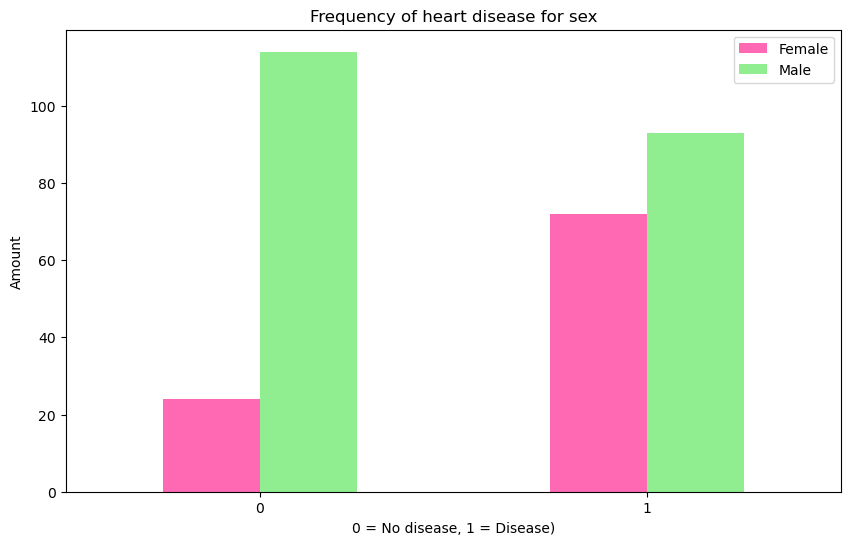

In [10]:
# Plotting data
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['hotpink', 'lightgreen'],
                                    width=0.5)
plt.title('Frequency of heart disease for sex')
plt.xlabel('0 = No disease, 1 = Disease)'),
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

## Age vs Max Heart Rate for Heart Disease

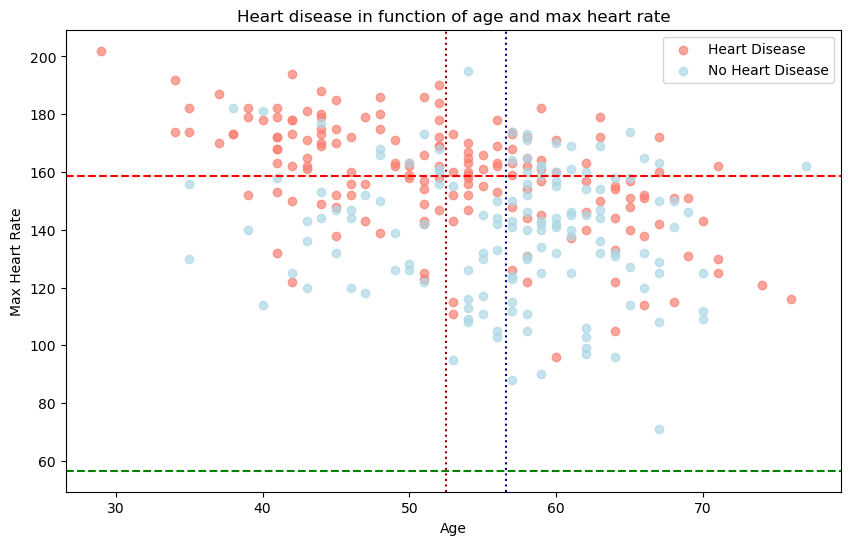

In [11]:
# Scatter plot for positive result
plt.figure(figsize=(10, 6))
plt.scatter(x=df.age[df.target==1], 
            y=df.thalach[df.target==1],
            color='salmon',
            alpha=0.7)

# Scatter plot for negative result
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0],
            color='lightblue',
            alpha=0.7)

avg_age_positive = df.age[df.target==1].mean()
avg_age_negative = df.age[df.target==0].mean()
avg_thalach_positive = df.thalach[df.target==1].mean()
avg_thalach_negative = df.thalach[df.target==0].mean()

#Plotting average line
plt.axhline(y=avg_thalach_positive, color='red', ls='--', label='Average heart rate for positive patients')
plt.axhline(y=avg_age_negative, color='green', ls='--', label='Average heart rate for negative patients')

# Add vertical average lines for age
plt.axvline(x=avg_age_positive, color='darkred', linestyle=':', label='Avg Age (Heart Disease)')
plt.axvline(x=avg_age_negative, color='darkblue', linestyle=':', label='Avg Age (No Heart Disease)')

plt.title('Heart disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Heart Disease', 'No Heart Disease'])

<Axes: ylabel='Frequency'>

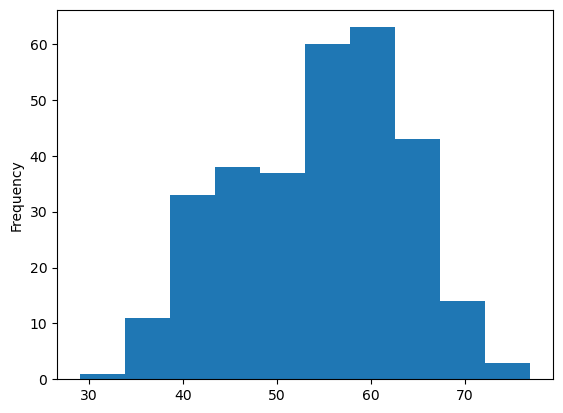

In [12]:
# Distribution of age with histogram
df.age.plot.hist()

## Heart diseases based on chest pain

In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

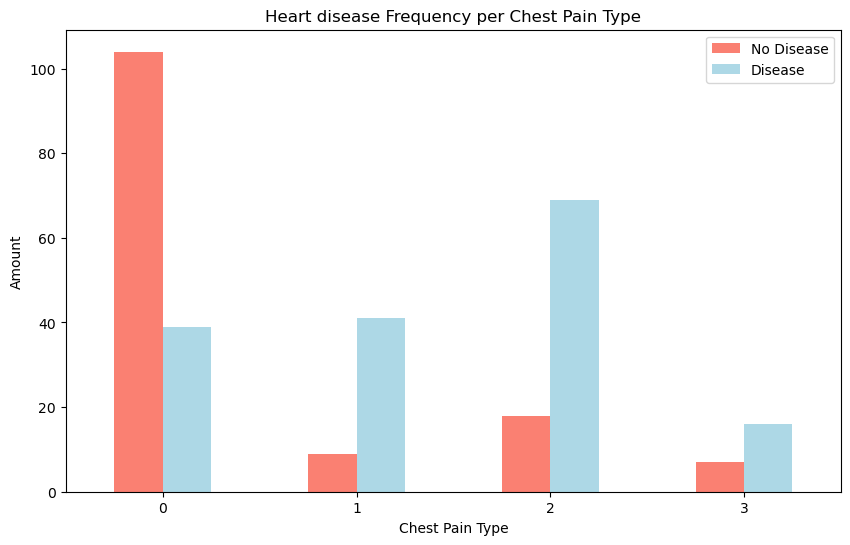

In [14]:
pd.crosstab(df.cp, df.target).plot(kind='bar', 
                                   color=['salmon', 'lightblue'],
                                   figsize=(10,6))
plt.title('Heart disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Relation between age, cholesterol and heart disease

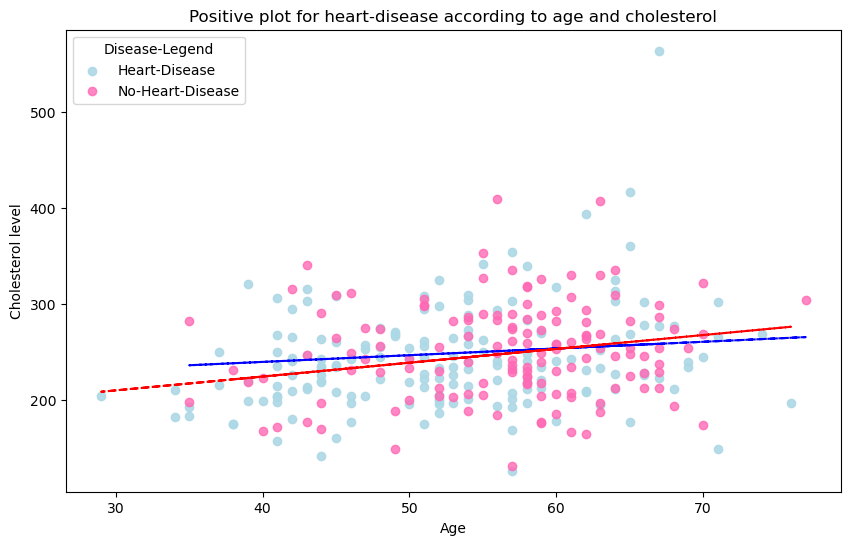

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target==1],
            df.chol[df.target==1],
            color='lightblue',
            alpha=0.9)

plt.scatter(df.age[df.target==0],
            df.chol[df.target==0],
            color='hotpink',
            alpha=0.8)

# Modeling trend line: For Negative-Result
z0 = np.polyfit(df.age[df.target==0], df.chol[df.target==0], 1)
p0 = np.poly1d(z0)
plt.plot(df.age[df.target==0], p0(df.age[df.target==0]), 'b--') #'b--': color and line style

# Modeling trend line: For Positive-Result
z1 = np.polyfit(df.age[df.target==1], df.chol[df.target==1], 1)
p1 = np.poly1d(z1)
plt.plot(df.age[df.target==1], p1(df.age[df.target==1]), ls='--', color='red')

plt.title('Positive plot for heart-disease according to age and cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol level')
plt.legend(['Heart-Disease', 'No-Heart-Disease'], title='Disease-Legend', loc='upper left');

## Make correlation matrix
* Calculates the correlation/dependency between the features
* Self correlation is always 1
* Correlation represents the rate of increase or decrease according to the feature

In [17]:
df.corr(method='pearson') #'pearson', kendall, spearman: method for correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


**Representing correlation with heatmap**

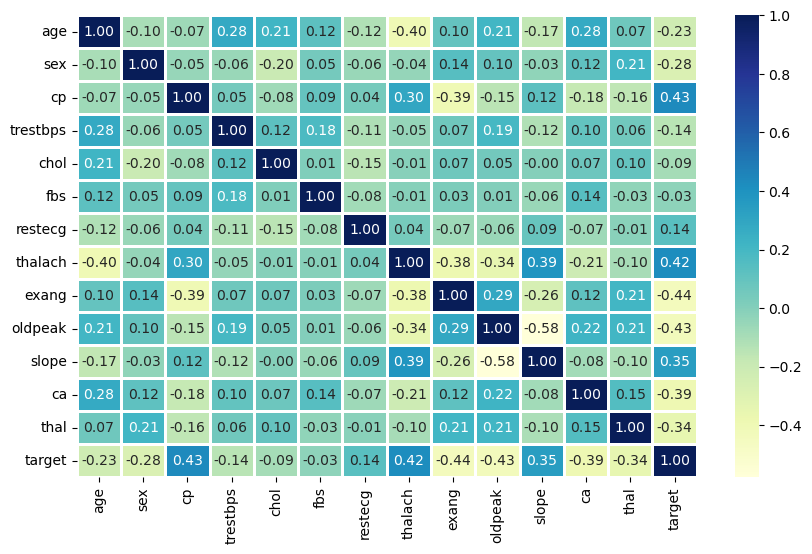

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 fmt='.2f',
                 linewidths=1,
                 cbar=True,
                 cmap='YlGnBu') # YlGnBu: Yellow, Green, Blue

**Relation between exang: exercise induced chest pain and target**

In [19]:
pd.crosstab(df.target, df.exang)

exang,0,1
target,,
0,62,76
1,142,23


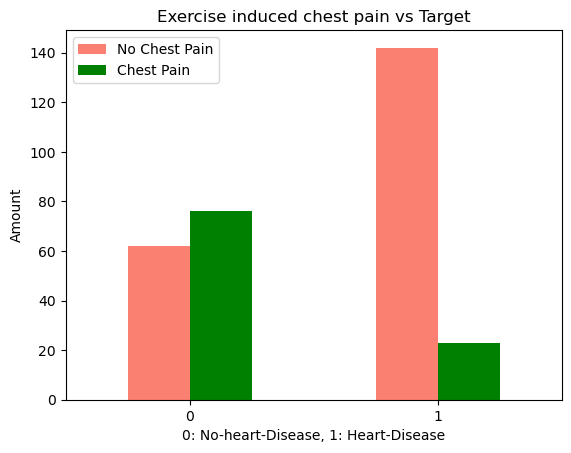

In [20]:
pd.crosstab(df.target, df.exang).plot(kind='bar', color=['salmon', 'green'])
plt.title('Exercise induced chest pain vs Target')
plt.xlabel('0: No-heart-Disease, 1: Heart-Disease')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['No Chest Pain', 'Chest Pain']);

**Above bar plot shows:**
* People who do not feel chest pain during exercise also have higher chances of getting heart disease (Second bar plot)
* This shows a negative correlation as lower the chest pain higher the chances of getting heart disease (According to data)

## Modeling

In [21]:
# Split X and y data
X = df.drop(columns=['target'])
y = df.target

In [22]:
# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Let's use following three machine learning models:
1. Logistic Regression
2. K-Nearest Neighbor Classifier
3. Random Forest Classifier

In [23]:
# Let's use above models in a dictionary:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Create a function that fits and scores the ML model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Used to fit and score the machine learning model using train and test sets.
    X_train: Training data sets (no labels: heart diesase or Not)
    X_test: Test data sets (no labels)
    y_train: Training labels
    y_test: Test labels
    '''
    np.random.seed(42)
    # Define an empty dictionary that stores the model and scores
    model_scores = {}
    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Score the model
        score = model.score(X_test, y_test)
        model_scores[model_name] = score
    return model_scores

In [24]:
# Lets evaluate the model
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)
model_scores

/Users/nareshdhami/Desktop/heart-diseases-project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Axes: >

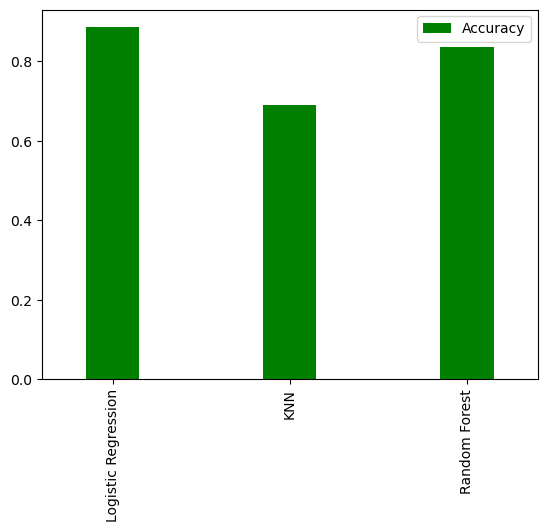

In [49]:
model_compares = pd.DataFrame(model_scores, index=['Accuracy'])
model_compares.T.plot(kind='bar', width=0.3, color=['green'])

## Hyperparameter Tuning by Hand
* Tuning KNN model

In [98]:
train_score = []
test_score = []

# Create a different value for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through the different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_score.append(knn.score(X_train, y_train))

    # Update test scores
    test_score.append(knn.score(X_test, y_test))

In [111]:
score_df = pd.DataFrame({
    'Train Score': train_score,
    'Test Score': test_score
})

In [112]:
score_df

,Train Score,Test Score
0,1.000000,0.622951
1,0.809917,0.639344
2,0.772727,0.655738
3,0.743802,0.672131
4,0.760331,0.688525
5,0.752066,0.721311
6,0.743802,0.704918
7,0.723140,0.688525
8,0.719008,0.688525
9,0.694215,0.704918


**Comparing Training and Test Score using DataFrame**

<Figure size 1000x800 with 0 Axes>

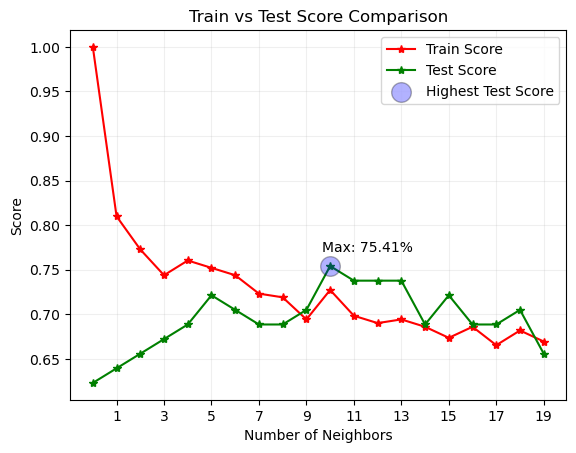

Maximum Test Score: 75.41%


In [138]:
plt.figure(figsize=(10,8))
score_df.plot(marker='*', color=['red', 'green'])
plt.title('Train vs Test Score Comparison')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.xticks(range(1, 21, 2))
plt.grid(visible=True, alpha=0.2)

#Pointing out the max point
max_test_score = max(test_score)
max_test_index = test_score.index(max(test_score))
best_neighbor = neighbors[max_test_index]
plt.scatter(max_test_index, max_test_score, color='blue', s=200, alpha=0.3, label='Highest Test Score', zorder=3, edgecolors='black')
plt.annotate(f'Max: {max_test_score*100:.2f}%',
             xy = (best_neighbor, max_test_score), 
             textcoords='offset points', 
             xytext=(10, 10), 
             ha='center')
plt.legend()
plt.show();
print(f'Maximum Test Score: {max(test_score)*100:.2f}%')

## Hyperparameter Tuning using RandomizedSearchCV

**LogisticRegression() & RandomForestClassifier()**

In [149]:
# Create a hyperparameter grid for LogisticRegression
lg_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [150]:
# LogirsticRegression()tunning using RandomizedSearchCV()
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lg_reg_grid,
                                n_iter=20,
                                cv=5,
                                verbose=True)

#Fit model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [151]:
# Finding best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [152]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [153]:
# RandomForestClassifier() Tuning using RandomizedSearchCV()
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

#Fir model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [154]:
# Finding best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [155]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperoarameter Tuning with GridSearchCV

In [156]:
# Create different hyperparameter grids
log_reg_grids = {
    'C': np.logspace(-4, 4, 30),
    'solver': ['liblinear']}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                          param_grid=log_reg_grids,
                          cv=5, 
                          verbose=True)

# Fir the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [157]:
# Checking best Parameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [158]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating Tuned Machine Learning Model beyond accuracy
* ROC curve, AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

In [196]:
# Make predictions
y_pred = gs_log_reg.predict(X_test)
y_score = gs_log_reg.predict_proba(X_test)[:, 1]

# Creating DataFrame out of the predicted data and actual datas
pred_comparison_df = pd.DataFrame({'True Labels':y_test, 
                                   'Predicted Labels': y_pred})

# Adding comparison column to make a comparison whether predicted and true labels are equal or not
pred_comparison_df['Comparison'] = pred_comparison_df['True Labels']==pred_comparison_df['Predicted Labels']

In [197]:
pred_comparison_df.Comparison.value_counts().reset_index()

,Comparison,count
0,True,54
1,False,7


**ROC Curve**

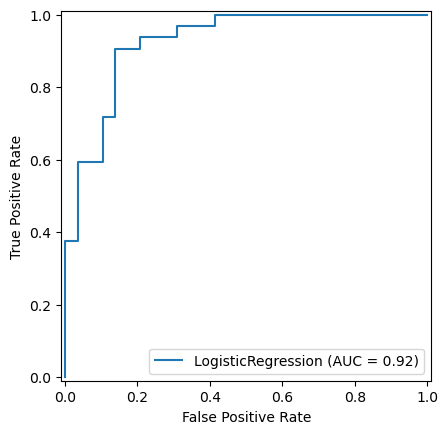

In [209]:
# Plot ROC Curve and calculate AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LogisticRegression')
display.plot();

**Plotting using matplotlib**

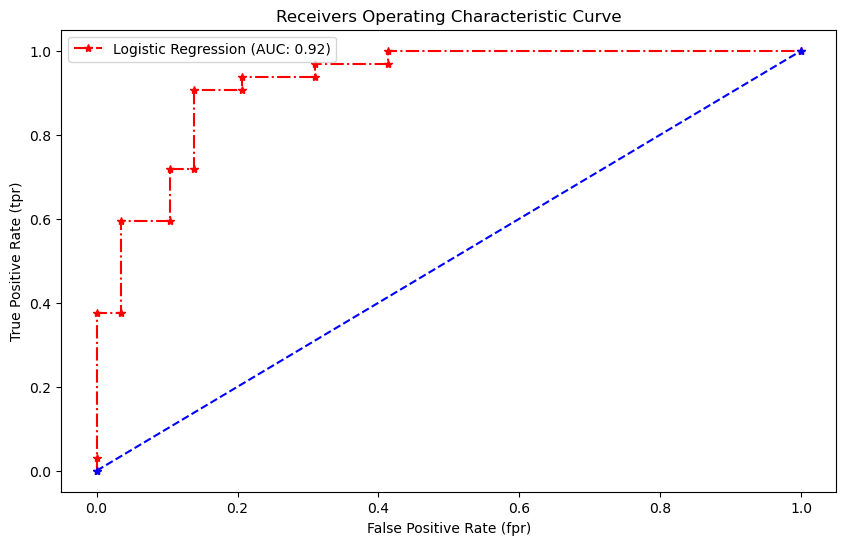

In [229]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, 'r-.*', label='LogisticRegression ROC Curve')
    plt.plot([0, 1], [0, 1], 'b--*', label='Random Classifier')
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receivers Operating Characteristic Curve')
    plt.legend([f'Logistic Regression (AUC: {roc_auc:.2f})'])
plot_roc_curve(fpr, tpr)

**ConfusionMatrix and Plotting Data**
* Using seaborn heatmap

In [230]:
print(confusion_matrix(y_test, y_pred))

[[25  4]
 [ 3 29]]


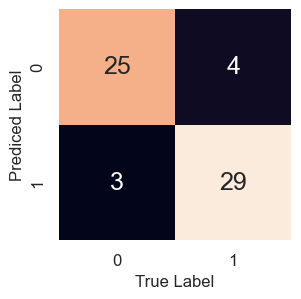

In [236]:
# Plotting confusion matrix
sns.set(font_scale=1.5)
def plot_confusion_mat(y_test, y_pred):
    '''
    Plots the confusion matrix plot using seaborn heatmap.
    '''
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), 
                     annot=True,
                     cbar=False)
    plt.xlabel('True Label', fontsize=12)
    plt.ylabel('Prediced Label', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
plot_confusion_mat(y_test, y_pred)

* Using ConfusionMatrixDisplay

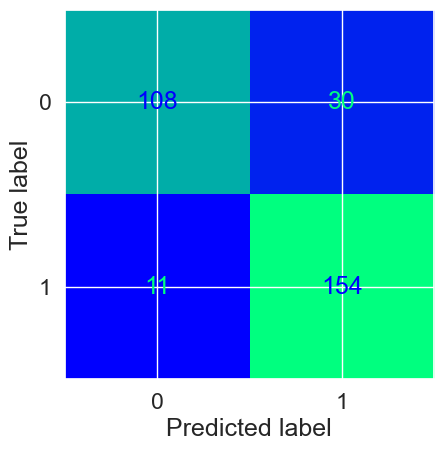

In [247]:
ConfusionMatrixDisplay.from_estimator(gs_log_reg, X, y, cmap='winter', xticks_rotation=0, colorbar=False);
# This shows the positive and negative values of whole model

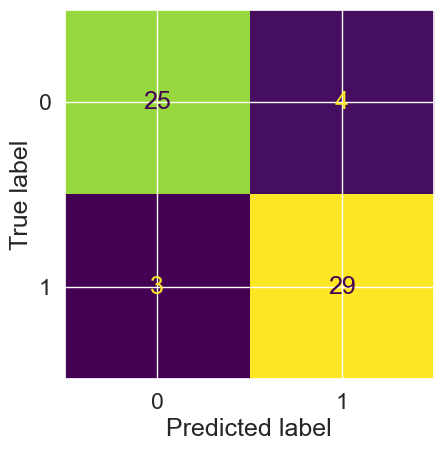

In [248]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False);
#This shows true and negative values of test sets

**Classification Report**

In [249]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculation evaluation metrics using cross-validation

In [250]:
# Check best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [251]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, 
                         solver='liblinear')

In [260]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, 
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [262]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [265]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring='precision')
cv_precision = cv_precision.mean()
cv_precision

0.8207936507936507

In [266]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            X, 
                            y, 
                            cv=5,
                            scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [268]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [275]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1': cv_f1}, index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


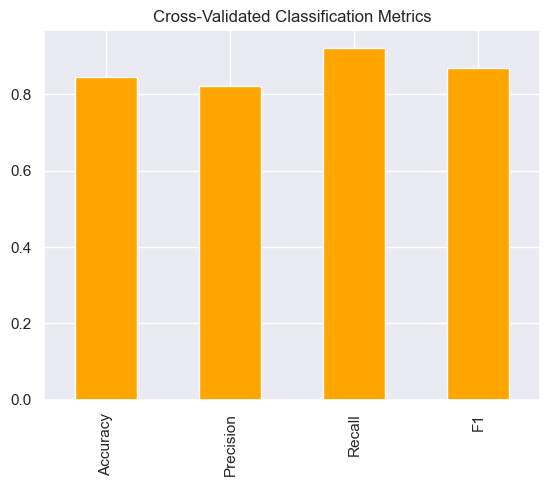

In [281]:
sns.set(font_scale=1)
cv_metrics.T.plot.bar(title = 'Cross-Validated Classification Metrics',
                     legend=False,
                     color='orange');

## Feature Importance
Which feature contributed most to the model

In [282]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

** coef_:**
* Each value represents weight assigned to each features
* Positive values increases the likelihood of the positive class
* Negative values decreases the likelihood of the positive class

In [284]:
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [287]:
# Match coef's of the features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

In [303]:
# Visualize feature importance
feature_df = pd.DataFrame.from_dict(data=feature_dict, orient='index', columns=['Importance'])
feature_df.reset_index().rename(columns={'index':'Features'})

,Features,Importance
0,age,0.003208
1,sex,-0.860620
2,cp,0.660014
3,trestbps,-0.011560
4,chol,-0.001665
5,fbs,0.040172
6,restecg,0.316034
7,thalach,0.024589
8,exang,-0.604702
9,oldpeak,-0.567955


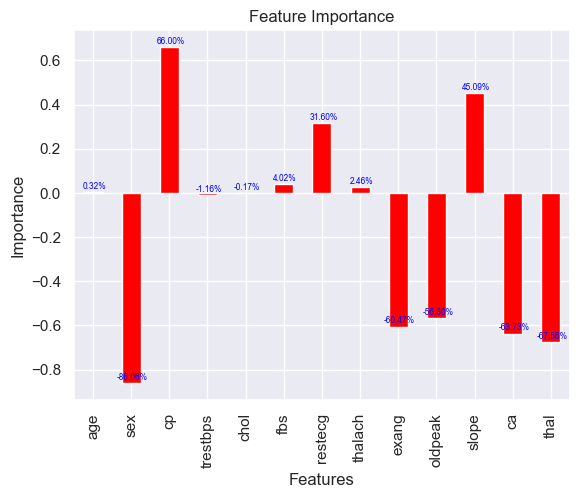

In [332]:
ax = feature_df.plot.bar(color='red', title='Feature Importance', xlabel='Features', ylabel='Importance', legend=False);
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.2f}%',
               xy = (p.get_x()+p.get_width()/2, height),
               xytext = (1, 1),
               textcoords = 'offset points',
               ha='center', 
               va='bottom',
               fontsize=6,
               color='blue')